Zad 1

In [90]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target
iris_X = (iris_X - iris_X.mean()) / iris_X.std()
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris_X, iris_Y, test_size=0.3)
 #An example of using the Euclidean distance
# a = (1, 2, 3)
# b = (4, 5, 6)
# dst = distance.euclidean(a, b)
# Checking the effectiveness of the classifier
# output = accuracy_score(labels_test, predictions)
# print(output)
k=10
predict=[]


In [91]:
def fun(k,features_test,features_train,labels_train, labels_test):    
    for i in range(0, len(features_test)):
        dis = []
        p0 = 0
        p1 = 0
        p2 = 0
        for j in range(0, len(features_train)):
            dst = distance.euclidean(features_test[i], features_train[j])
            tup = (dst, labels_train[j])
            dis.append(tup)
        dis.sort()
        dis = dis[:k]
        species = np.matrix(dis)
        species = species[:, 1]
        for s in species:
            if s == 0:
                p0 += 1
            elif s == 1:
                p1 += 1
            else:
                p2 += 1
        if p0 >= p1 and p0 >= p2:
            predict.append(0)
        elif p1 >= p0 and p1 >= p2:
            predict.append(1)
        else:
            predict.append(2)
    return labels_test, predict

In [92]:
[labels_test, predict] = fun(k,features_test,features_train,labels_train, labels_test)
print(labels_test, predict)


[2 1 1 1 1 0 0 2 2 2 0 1 0 1 1 1 0 1 1 0 0 2 1 2 0 1 0 1 1 1 1 1 2 1 2 2 1
 2 1 1 2 1 2 0 2] [2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2]


In [93]:
output = accuracy_score(labels_test, predict)
print(output)

0.9777777777777777


Zad 2

In [94]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target
iris_X = (iris_X - iris_X.mean()) / iris_X.std() 
features_train, features_test, labels_train, labels_test = train_test_split(iris_X, iris_Y, test_size=0.3)
k = 10
knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
knn.fit(features_train, labels_train)
predict = knn.predict(features_test)
output = accuracy_score(labels_test, predict)
print(output)

0.9555555555555556


Zad 3

In [95]:
from sklearn.datasets import load_iris
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

clf.predict(iris.data[:1, :])
clf.predict_proba(iris.data[:1, :])
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_png('iris.png')


Exercise

Liczba cyfr:  60000
Liczba pikseli w jednym obrazie:  784


C:\Users\szyke\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


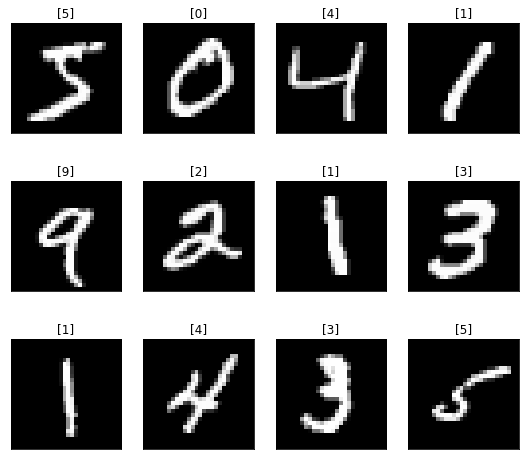

F1 =  0.8665000000000002
[[ 914    0    8    8    6   12   10    5   14    3]
 [   1 1088   12   14    2    5    2    1   10    0]
 [  11   13  867   21   22   11   10   32   34   11]
 [   7    5   39  845    6   46    4   19   20   19]
 [   3    4    6    7  834   12   12    9   27   68]
 [  15    8    5   49   13  719   23    8   30   22]
 [  25    6   13    8   34   18  830    2   20    2]
 [   2   14   23   10   11    6    0  905   11   46]
 [  11   10   29   37   14   22   18    9  796   28]
 [  13    3    6   31   24   13    5   13   34  867]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.83      0.81      0.82       892
           6       0.91      0.87      0.89       958
           

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from scipy.io import loadmat
def plot_mnist(img, title, h, w, row=3, col=4):
    plt.figure(figsize=(1.8 * col, 2.4 * row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(row * col):
        plt.subplot(row, col, i + 1)
        plt.imshow(img[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(title[i], size=12)
        plt.xticks(())
        plt.yticks(())
dane = loadmat('mnist.mat')
features_train= dane['trainX']
labels_train = dane['trainY']
features_test=dane['testX']
labels_test=dane['testY']
labels_train=labels_train.T
labels_test=labels_test.T
h = 28
w = 28
print("Liczba cyfr: ", features_train.shape[0])
print('Liczba pikseli w jednym obrazie: ', features_train.shape[1])
plot_mnist(features_train, labels_train, h, w)
plt.show()
DEPTH = 10
tree = tree.DecisionTreeClassifier(max_depth = DEPTH)
tree.fit(features_train, labels_train)
predict = tree.predict(features_test)
f1 = f1_score(labels_test, predict, average='micro')
print('F1 = ', f1)
c = confusion_matrix(labels_test, predict)
print(c)
report = classification_report(labels_test, predict)
print(report)